### Phase Retrieval with phastphase
In this example, we will do a simple demonstration recovering a (truncated) Lagurre-Gaussian Mode using phastphase. 

In [9]:
%load_ext autoreload
%autoreload 2


import sys, os
import scipy
from scipy import special
import numpy as np
import torch
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '../../fastphase'))
import phastphase


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
if torch.cuda.is_available():
    tensor_device = torch.device('cuda')
else:
    tensor_device = torch.device('cpu')

Calculated reference location is: [0, 0]
iter 1 - fval: 27233.8684
iter 2 - fval: 26432.9547
iter 3 - fval: 25284.3890
iter 4 - fval: 23445.9320
iter 5 - fval: 20399.1412
iter 6 - fval: 16002.3392
iter 7 - fval: 11475.7531
iter 8 - fval: 8502.3556
iter 9 - fval: 8502.3556
iter 10 - fval: 7132.3585
iter 11 - fval: 6510.4102
iter 12 - fval: 5122.1000
iter 13 - fval: 5122.1000
iter 14 - fval: 4309.6355
iter 15 - fval: 4309.6355
iter 16 - fval: 3967.9416
iter 17 - fval: 3710.5695
iter 18 - fval: 3427.9404
iter 19 - fval: 3347.9791
iter 20 - fval: 3006.6416
iter 21 - fval: 2795.2305
iter 22 - fval: 2744.6055
iter 23 - fval: 2378.7394
iter 24 - fval: 2029.0299
iter 25 - fval: 1945.6730
iter 26 - fval: 1921.7643
iter 27 - fval: 1474.5417
iter 28 - fval: 1432.2680
iter 29 - fval: 1432.2680
iter 30 - fval: 1205.5227
iter 31 - fval: 1180.8302
iter 32 - fval: 1030.7027
iter 33 - fval: 892.3888
iter 34 - fval: 835.5980
iter 35 - fval: 690.5291
iter 36 - fval: 429.2408
iter 37 - fval: 365.4444
iter

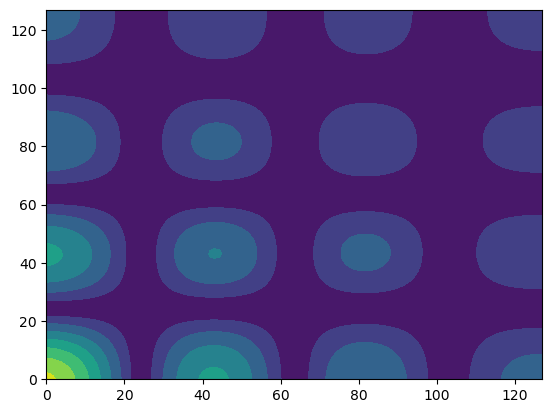

In [99]:
p = 7
n_pts = 2**p
oversample_factor = 2
herm_gauss_ord = 3
x = np.linspace(-1.4,1.4, n_pts)
y = np.linspace(-1.4,1.4, n_pts)
x,y = np.meshgrid(x,y)
r = np.sqrt((x+1.4)**2+(y+1.4)**2)
herm_gauss_beam = special.eval_hermite(herm_gauss_ord,np.sqrt(2)*x)*special.eval_hermite(herm_gauss_ord,np.sqrt(2)*y)*np.exp(-(x**2 + y**2))*np.exp(-(r)/2.5)*np.exp(5j*np.arctan2(x,y)/2)
near_field = torch.tensor(herm_gauss_beam,device=tensor_device)
near_field = near_field/torch.exp(1j*torch.angle(near_field[0,0]))
far_field = torch.square(torch.abs(torch.fft.fftn(near_field,(oversample_factor*n_pts, oversample_factor*n_pts), norm='ortho')))
reconstruction = phastphase.retrieve(far_field,[n_pts,n_pts],verbose = True)
reconstruction = reconstruction/torch.exp(1j*torch.angle(reconstruction[0,0]))
print(torch.linalg.vector_norm(reconstruction-near_field))
plt.contourf(np.abs(herm_gauss_beam))